Username: n
Password: n

What category would you like to view?
1) Traditional Art
2) Modern Art
3) Contemporary Art
4) Exit

Enter your choice (1, 2, 3, or 4 to exit): 2
Displaying images...


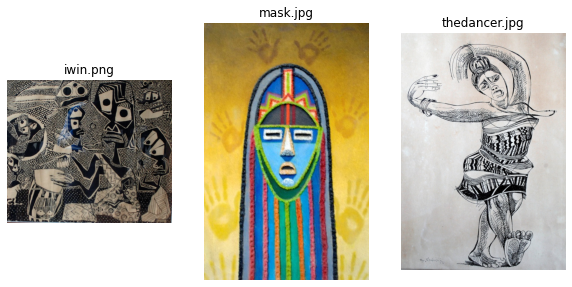

Select an image by entering its number (1, 2, 3, ...): 2
Selected image: mask.jpg

Choose Edge Detection Technique:
1. Canny
2. Sobel
3. Prewitt
4. Roberts
5. Laplacian
Enter your choice (a-e): 5
Do you want to save the result? (y/n): n


In [21]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt 

def login():
    username = input("Username: ")
    password = input("Password: ")

    if username == "" or password == "":
        print("Invalid login credentials.\n")
        return False
    else:
        return True

def category():
    while True:
        choice = input(
            "\nWhat category would you like to view?\n"
            "1) Traditional Art\n"
            "2) Modern Art\n"
            "3) Contemporary Art\n"
            "4) Exit\n\n"
            "Enter your choice (1, 2, 3, or 4 to exit): "
        ).strip().lower()

        if choice == "4":
            print("Exiting program. Thank you!")
            return None

        folder_map = {
            "1": "images/traditional",
            "2": "images/modern",
            "3": "images/contemporary"
        }

        if choice in folder_map:
            print("Displaying images...")
            folder_path = folder_map[choice]
            if not os.path.exists(folder_path):
                print(f"Folder '{folder_path}' not found.")
                continue

            images = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
            if not images:
                print("No images found in this category.")
                continue

            plt.figure(figsize=(10, 5))
            for i, file in enumerate(images, 1):
                img = cv2.imread(os.path.join(folder_path, file))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                plt.subplot(1, len(images), i)
                plt.imshow(img)
                plt.title(file)
                plt.axis("off")

            plt.show()

            art = input("Select an image by entering its number (1, 2, 3, ...): ").strip()
            if art.isdigit():
                index = int(art) - 1
                if 0 <= index < len(images):
                    selected_path = os.path.join(folder_path, images[index])
                    print(f"Selected image: {images[index]}")
                    return selected_path
                else:
                    print("Invalid image number.")
            else:
                print("Invalid input.")
        else:
            print("Invalid choice.")

def apply_canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

def apply_sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    return np.uint8(sobel)

def apply_prewitt(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewittx = cv2.filter2D(gray, -1, kernelx)
    prewitty = cv2.filter2D(gray, -1, kernely)
    prewitt = cv2.addWeighted(prewittx, 0.5, prewitty, 0.5, 0)
    return prewitt

def apply_roberts(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernelx = np.array([[1, 0], [0, -1]])
    kernely = np.array([[0, 1], [-1, 0]])
    robertsx = cv2.filter2D(gray, -1, kernelx)
    robertsy = cv2.filter2D(gray, -1, kernely)
    roberts = cv2.addWeighted(robertsx, 0.5, robertsy, 0.5, 0)
    return roberts

def apply_laplacian(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lap = cv2.Laplacian(gray, cv2.CV_64F)
    return np.uint8(np.absolute(lap))

# === MAIN FUNCTION ===
def main():
    if not login():
        return

    image_path = category()
    if not image_path:
        return

    image = cv2.imread(image_path)
    if image is None:
        print("Could not load image. Please check the path.")
        return

    print("\nChoose Edge Detection Technique:")
    print("1. Canny")
    print("2. Sobel")
    print("3. Prewitt")
    print("4. Roberts")
    print("5. Laplacian")

    choice = input("Enter your choice (a-e): ")

    if choice == '1':
        result = apply_canny(image)
        method = "Canny"
    elif choice == '2':
        result = apply_sobel(image)
        method = "Sobel"
    elif choice == '3':
        result = apply_prewitt(image)
        method = "Prewitt"
    elif choice == '4':
        result = apply_roberts(image)
        method = "Roberts"
    elif choice == '5':
        result = apply_laplacian(image)
        method = "Laplacian"
    else:
        print("Invalid choice.")
        return

    cv2.imshow(f"{method} Edge Detection", result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    save = input("Do you want to save the result? (y/n): ")
    if save.lower() == 'y':
        output_path = f"{method}_edge_result.png"
        cv2.imwrite(output_path, result)
        print(f"Result saved as {output_path}")
    

if __name__ == "__main__":
    main()
